In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DataSet/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<Axes: >

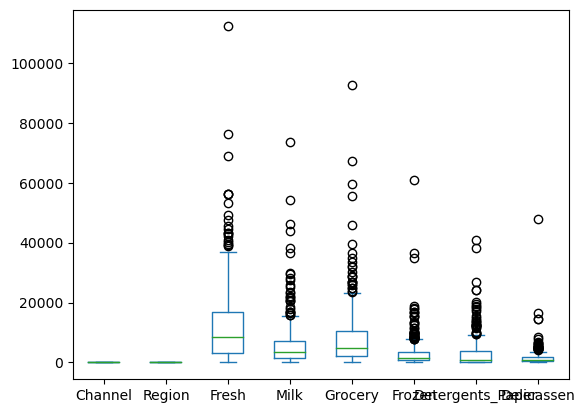

In [6]:
data.plot(kind='box')

In [7]:
x = data

### Kmeans Clustering 

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=20)
    km.fit(x)
    wcss.append(km.inertia_)

wcss

[157595857524.96136,
 113217528878.79837,
 80332414178.02908,
 64855545845.9014,
 53056177991.783966,
 47500995877.96256,
 41574366268.73305,
 35921434553.601166,
 32922134548.1643,
 29902903114.75149]

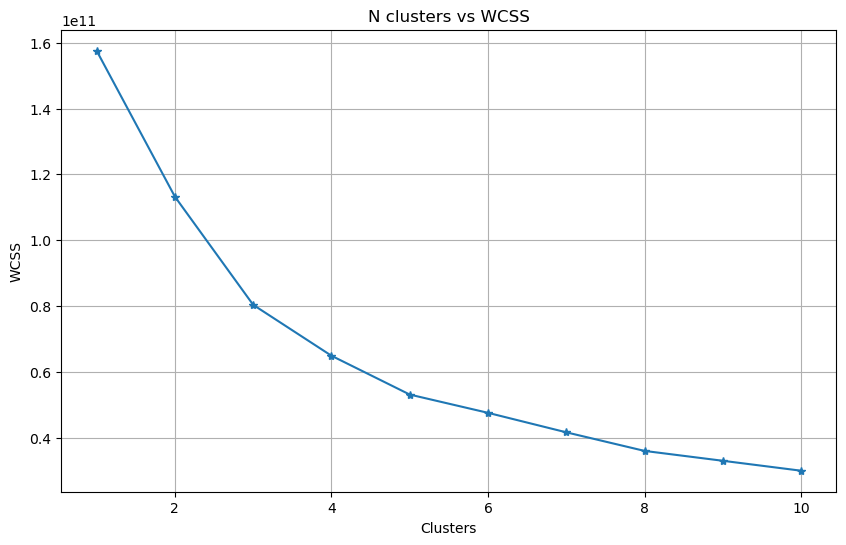

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,11), wcss, marker='*')
plt.grid()
ax.set(title="N clusters vs WCSS", xlabel="Clusters", ylabel="WCSS");

Choosing K as 3 

In [10]:
km = KMeans(n_clusters=5, n_init=20)
km.fit(x)

KMeans(n_clusters=5, n_init=20)

In [11]:
cluster_labels = km.predict(x)

In [12]:
cluster_labels


array([3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 1, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 0, 1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 3, 3, 1, 0, 0, 2, 1, 1, 0, 0,
       3, 0, 0, 4, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 4, 3, 0, 3, 0,
       3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 0, 3, 3, 3, 0, 3, 1, 3, 4, 4, 2,
       3, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 1, 3, 0, 3, 0,
       3, 0, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 3, 1, 3,
       3, 0, 0, 1, 3, 0, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 1, 1, 3,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 3, 0, 0, 1, 0, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 1,
       1, 3, 3, 0, 3, 3, 1, 3, 3, 0, 3, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3,
       0, 0, 0, 1, 0, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 1, 2, 1,
       3, 1, 1, 1, 3, 3, 3, 0, 1, 3, 1, 3, 3, 3, 1,

In [13]:
pd.Series(cluster_labels).value_counts()

3    240
1    108
0     74
2     13
4      5
dtype: int64

#### Plotting the observations

In [14]:
import seaborn as sns

In [15]:
x['Labels'] = cluster_labels
x.Labels.unique()

array([3, 1, 0, 2, 4], dtype=int32)

In [16]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,3


In [ ]:
sns.pairplot(x, hue="Labels")
plt.show()

### PCA For dimentionality reduction

Before implementing PCA Scaling the data

In [18]:
x = data.drop('Labels', axis=1)
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
from sklearn.preprocessing import scale
scaled_df = pd.DataFrame(scale(x),index = x.index, columns=x.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


applying PCA on scaled data and transforming it into 2 Principal Components

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [21]:
pc_array = pca.fit_transform(scaled_df)

In [22]:
pc_array

array([[ 8.43938928e-01, -5.15350749e-01],
       [ 1.06267645e+00, -4.84601258e-01],
       [ 1.26914052e+00,  6.82054553e-01],
       [-1.05678239e+00,  6.10821496e-01],
       [ 6.34030484e-01,  9.74198836e-01],
       [ 5.30110898e-01, -5.85411382e-01],
       [ 3.99560245e-01, -8.46342878e-01],
       [ 7.91165650e-01, -4.61140175e-01],
       [-6.63831131e-01, -5.77465454e-01],
       [ 2.15068480e+00, -6.17913981e-01],
       [ 1.25599389e+00, -5.12452434e-01],
       [-1.68210612e-01, -6.88796117e-01],
       [ 1.43985588e+00,  6.08852947e-01],
       [ 1.40695611e+00, -1.60564663e-01],
       [ 1.37395999e+00,  6.85013841e-02],
       [-1.07181521e+00, -5.19859188e-01],
       [ 1.25801233e+00, -1.12165441e+00],
       [-6.18599013e-01,  2.82406711e-01],
       [ 8.67093429e-01,  2.20448419e-01],
       [-4.84666795e-01, -5.76463994e-01],
       [ 3.31514687e-01, -1.94171620e-01],
       [-1.25444108e+00, -3.05734448e-01],
       [-6.95754707e-01,  2.16418147e+00],
       [ 4.

In [23]:
pc_array.shape

(440, 2)

In [24]:
pc_df = pd.DataFrame(pc_array,columns=['PC1','PC2'])
pc_df

,PC1,PC2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


In [25]:
pc_df.corr().round(1)

,PC1,PC2
PC1,1.0,-0.0
PC2,-0.0,1.0


In [26]:
pca.explained_variance_

array([3.10707136, 1.79404441])

In [27]:
pca.explained_variance_ratio_ * 100

array([38.75012291, 22.37458795])

Applying kmeans clustering on the new df

In [28]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=20)
    km.fit(pc_df)
    wcss.append(km.inertia_)

wcss

[2151.589822364631,
 1278.1665563198858,
 889.7117585983331,
 600.6962960954098,
 421.3146175003158,
 343.939816761125,
 292.1937303673991,
 248.28965317360695,
 211.30821473808732,
 189.35302924459438]

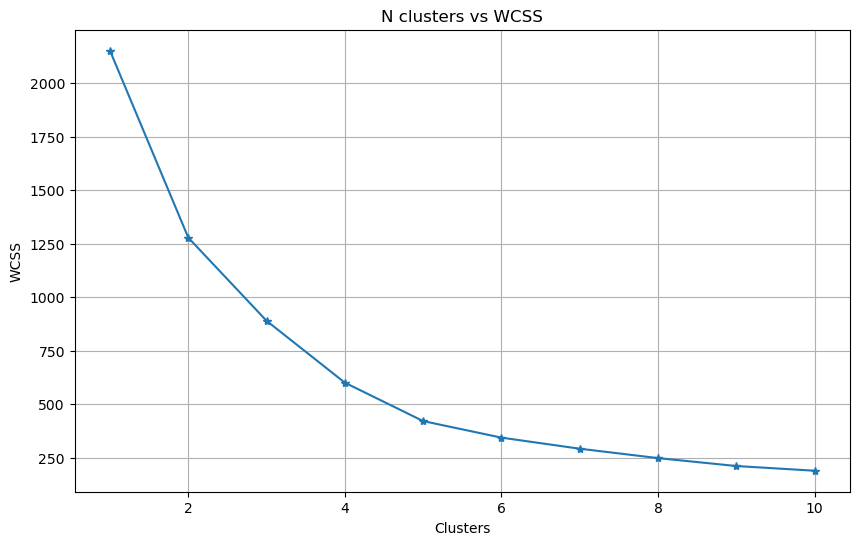

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,11), wcss, marker='*')
plt.grid()
ax.set(title="N clusters vs WCSS", xlabel="Clusters", ylabel="WCSS");

Taking the value for n as 5 and applying to kmeans

In [30]:
km = KMeans(n_clusters=5, n_init=20)
km.fit(pc_df)
y_pred = km.predict(pc_df)
y_pred

array([4, 4, 4, 0, 2, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0,
       2, 1, 4, 4, 0, 0, 4, 2, 0, 0, 0, 2, 0, 4, 2, 4, 4, 2, 2, 0, 4, 4,
       4, 4, 4, 1, 4, 4, 0, 0, 0, 4, 0, 0, 1, 4, 0, 0, 4, 1, 4, 4, 0, 1,
       0, 4, 0, 0, 2, 2, 0, 2, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 1, 1, 2,
       0, 2, 0, 2, 1, 2, 4, 0, 4, 0, 0, 0, 4, 4, 4, 2, 0, 0, 4, 4, 4, 4,
       0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 4, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       2, 0, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 2, 2, 4,
       0, 0, 4, 4, 2, 0, 0, 4, 0, 4, 0, 4, 0, 1, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       4, 2, 4, 2, 4, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 4, 0, 4, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4,

In [31]:
labelled_df_1 = pd.DataFrame(pc_df, columns=pc_df.columns)
labelled_df_1

,PC1,PC2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


In [32]:
labelled_df_1['Label'] = y_pred

In [33]:
labelled_df_1


,PC1,PC2,Label
0,0.843939,-0.515351,4
1,1.062676,-0.484601,4
2,1.269141,0.682055,4
3,-1.056782,0.610821,0
4,0.634030,0.974199,2
...,...,...,...
435,0.222884,2.480505,2
436,-1.290172,1.560397,2
437,3.865149,-0.479854,4
438,-1.097067,-0.069896,0


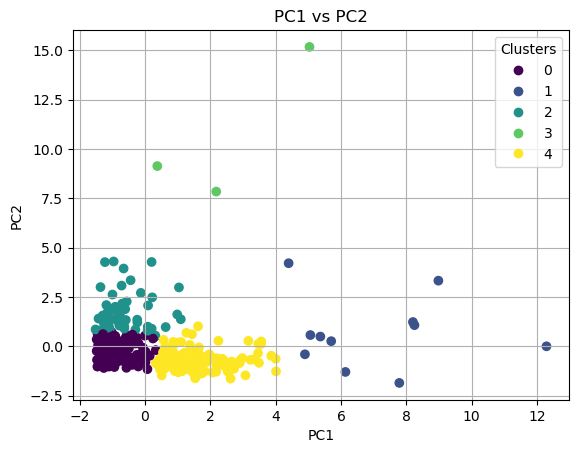

In [34]:

scatter = plt.scatter(labelled_df_1['PC1'], labelled_df_1['PC2'], c= labelled_df_1.Label)
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid();


### Agglomerative Clustering

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [36]:
mergings = linkage(pc_df, method="centroid")

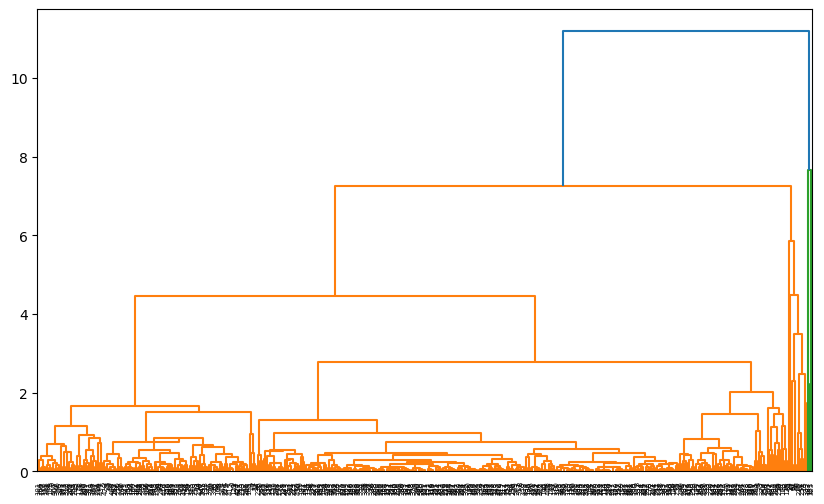

In [37]:
plt.figure(figsize=(10,6))
dendrogram(mergings);

In [38]:
cluster_labels = fcluster(mergings,9, criterion="distance")

In [39]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
pc_df.drop(columns=['Label'], axis = 1, inplace=True)

Choosing number of clusters as 4

In [41]:
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(n_clusters=4)
cluster_labels = aggc.fit_predict(pc_df)

In [42]:
cluster_labels

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 0, 0, 2, 3, 2, 2, 0, 3,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,

In [43]:
pc_df

,PC1,PC2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


In [44]:
clustered_df2 = pc_df
clustered_df2

,PC1,PC2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


In [45]:
clustered_df2['Label'] = cluster_labels

In [46]:
clustered_df2

,PC1,PC2,Label
0,0.843939,-0.515351,2
1,1.062676,-0.484601,2
2,1.269141,0.682055,2
3,-1.056782,0.610821,0
4,0.634030,0.974199,2
...,...,...,...
435,0.222884,2.480505,0
436,-1.290172,1.560397,0
437,3.865149,-0.479854,2
438,-1.097067,-0.069896,0


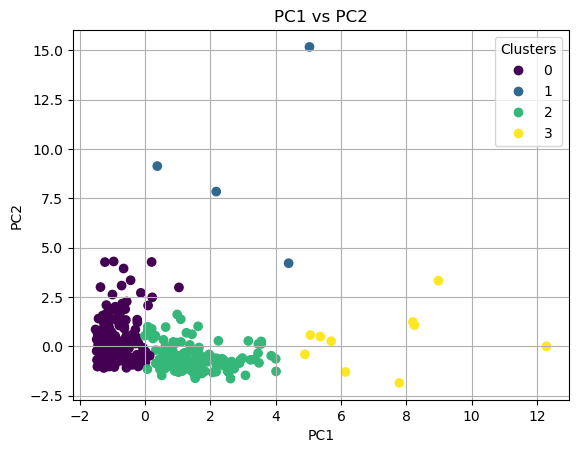

In [47]:

scatter = plt.scatter(clustered_df2['PC1'], clustered_df2['PC2'], c= clustered_df2.Label)
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid();

### Training the model with Agglomerative clustering with actual Data

In [48]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [49]:
mergings = linkage(x, method="centroid")


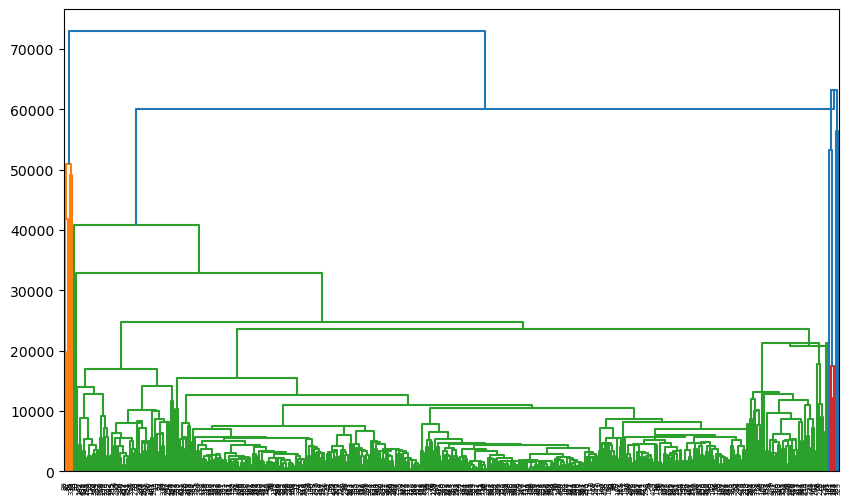

In [50]:
plt.figure(figsize=(10,6))
dendrogram(mergings);

Choosing optimum number of clusters as 5

In [51]:
aggc = AgglomerativeClustering(n_clusters=5)
y_pred = aggc.fit_predict(x)
y_pred

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 0, 3, 4, 1, 3, 0, 3, 3, 0, 0, 3, 0, 4, 1, 3, 3, 0, 4,
       0, 4, 4, 2, 0, 4, 0, 0, 1, 0, 3, 0, 4, 0, 3, 0, 0, 2, 0, 0, 0, 4,
       0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 4,
       0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 3, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 0, 3, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 3, 3, 0,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 3, 4, 0, 0, 0, 0, 4, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 3,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 3, 0, 3, 0, 0, 1, 1, 0, 0, 3, 0,
       0, 0, 4, 3, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 1, 3, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3,

In [52]:
x['Labels'] = y_pred
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,3
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,0


In [ ]:
sns.pairplot(x, hue="Labels")
plt.show()